In [3]:
import pandas as pd

df = pd.read_csv('../../common/assets/dataset.csv')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [67]:
# checking_status — Статус существующего расчетного счета (текущий счет). 
# duration — Срок кредита в месяцах. 
# credit_history — Кредитная история: кредиты, взятые и своевременно погашенные, задержки, критические случаи. 
# purpose — Цель получения кредита. 
# credit_amount — Сумма кредита. 
# savings_status — Статус сберегательного счета или облигаций. 
# employment — Текущий стаж работы в годах. 
# installment_commitment — Размер ежемесячного платежа в процентах от располагаемого дохода. 
# personal_status — Личные данные: пол и семейное положение. 
# other_parties — Другие заемщики или поручители. 
# residence_since — Срок проживания по текущему адресу в годах. 
# property_magnitude — Величина собственности (например, тип имущества). 
# age — Возраст клиента. 
# other_payment_plans — Другие планы по выплатам (например, по другим кредитам). 
# housing — Жилищные условия (аренда, собственность и т.д.). 
# existing_credits — Количество уже существующих кредитов у клиента. 
# job — Тип работы (профессия). 
# num_dependents — Количество иждивенцев. 
# own_telephone — Наличие собственного телефона (да/нет). 
# foreign_worker — Является ли клиент иностранным работником (да/нет). 
# class — Класс — целевая переменная (например, хороший или плохой заемщик).

/tmp/ipykernel_18672/3858866768.py:40: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2.set_ylim(0, max(missing_percentage)*1.2)
/tmp/ipykernel_18672/3858866768.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(filled_data.index, rotation=45, ha='right', fontsize=10)


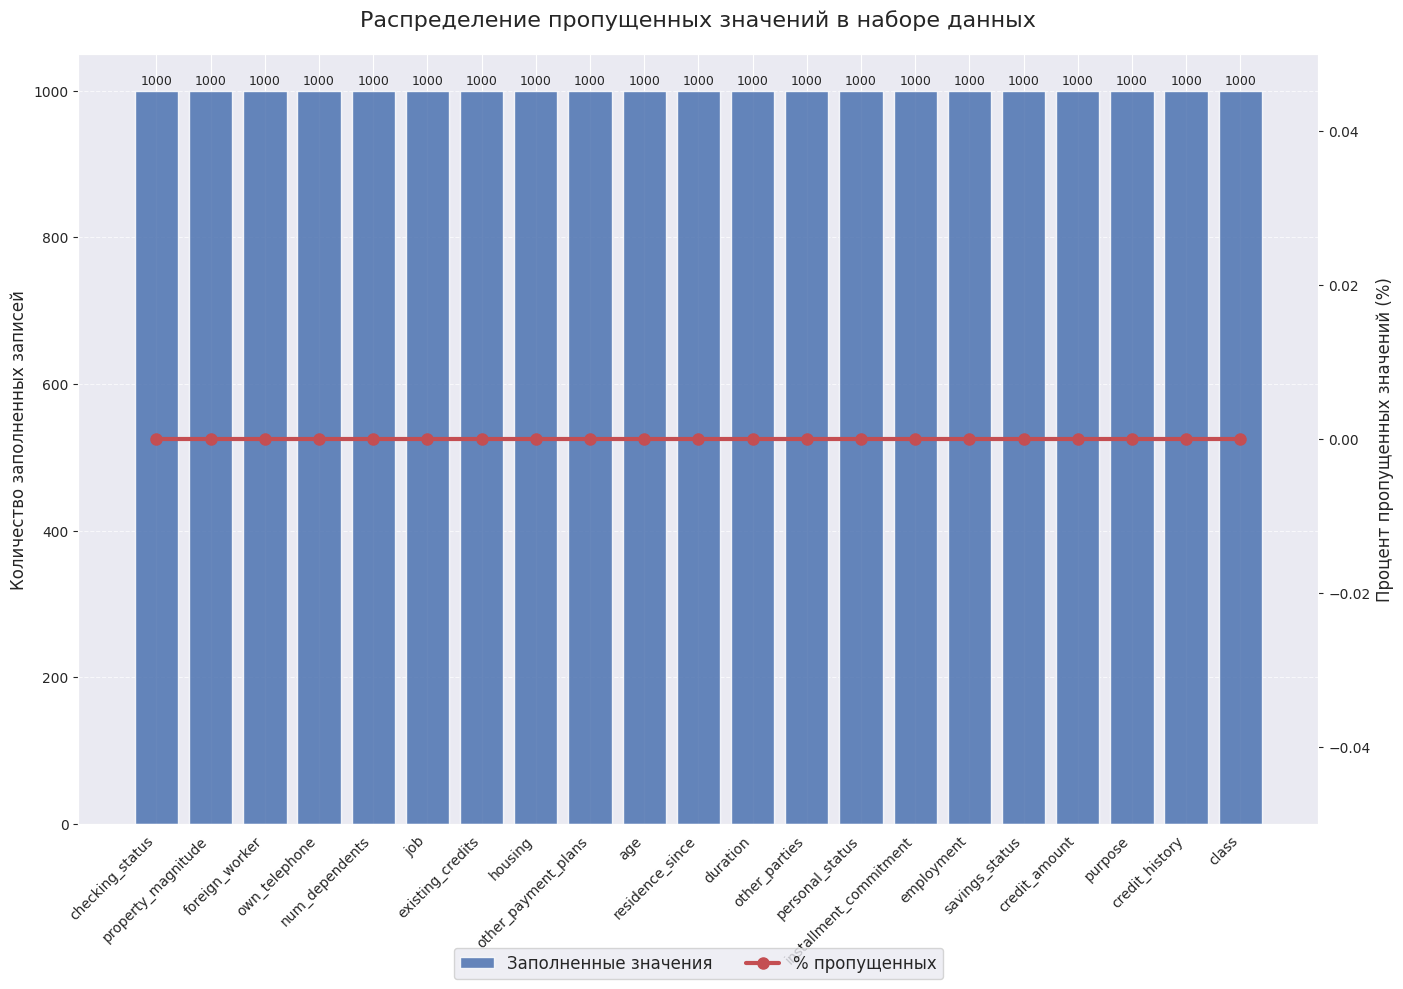

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Расчет показателей
total_rows = len(df)
missing_data = df.isnull().sum().sort_values(ascending=False)
filled_data = total_rows - missing_data
missing_percentage = (missing_data / total_rows * 100).round(1)

# Создание фигуры
plt.figure(figsize=(16, 10))
ax1 = plt.gca()
ax2 = ax1.twinx()

# График заполненных значений (столбцы)
bars = ax1.bar(
    filled_data.index,
    filled_data.values,
    color='#4c72b0',
    alpha=0.85,
    edgecolor='w',
    label='Заполненные значения'
)

# График пропущенных значений (линия)
line = ax2.plot(
    missing_percentage.index,
    missing_percentage.values,
    color='#c44e52',
    marker='o',
    markersize=8,
    linewidth=3,
    label='% пропущенных'
)

# Настройка осей
ax1.set_ylabel('Количество заполненных записей', fontsize=12)
ax2.set_ylabel('Процент пропущенных значений (%)', fontsize=12)
ax2.set_ylim(0, max(missing_percentage)*1.2)
ax1.set_xticklabels(filled_data.index, rotation=45, ha='right', fontsize=10)
plt.title('Распределение пропущенных значений в наборе данных', fontsize=16, pad=20)

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        height + 5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Добавление значений на линию
for i, perc in enumerate(missing_percentage):
    if perc > 0:
        ax2.text(
            i,
            perc + 1,
            f'{perc}%',
            ha='center',
            color='#c44e52',
            fontweight='bold',
            fontsize=10
        )

# Легенда
lines = [bars, line[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=12)

# Сетка
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(visible=False)

# Выделение проблемных признаков
problem_threshold = 10  # Порог для выделения проблемных признаков
for i, perc in enumerate(missing_percentage):
    if perc > problem_threshold:
        ax1.get_xticklabels()[i].set_color('red')
        ax1.get_xticklabels()[i].set_fontweight('bold')

plt.show()

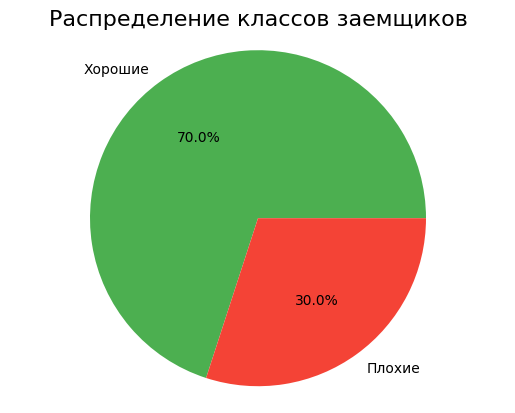

In [84]:
class_counts = df['class'].value_counts()
plt.pie(class_counts, 
        labels=['Хорошие', 'Плохие'],
        autopct='%1.1f%%',
        colors=['#4CAF50', '#F44336'])
plt.title('Распределение классов заемщиков', fontsize=16)
plt.axis('equal')
plt.show()

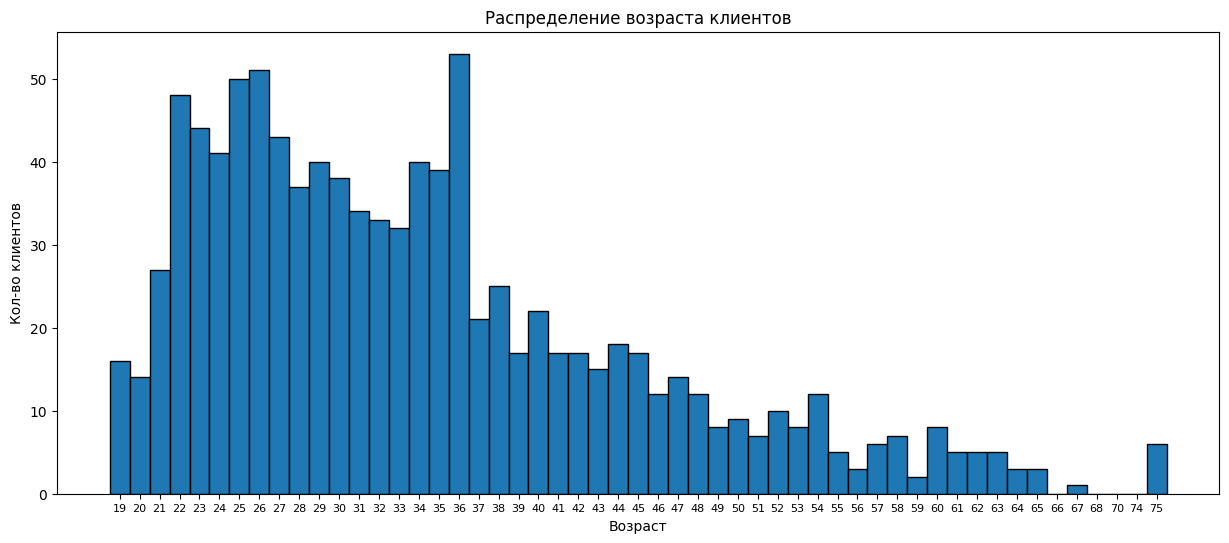

In [69]:
unique_ages = df["age"].dropna().drop_duplicates().sort_values()
n_bins = len(unique_ages)
plt.figure(figsize=(15, 6))
_, bins, _ = plt.hist(df["age"], bins=n_bins, edgecolor='black')
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.xticks(ticks=bin_centers, labels=unique_ages.astype(int))
plt.xlabel("Возраст")
plt.ylabel("Кол-во клиентов")
plt.title("Распределение возраста клиентов")
plt.xticks(rotation=0, fontsize=8)
plt.show()

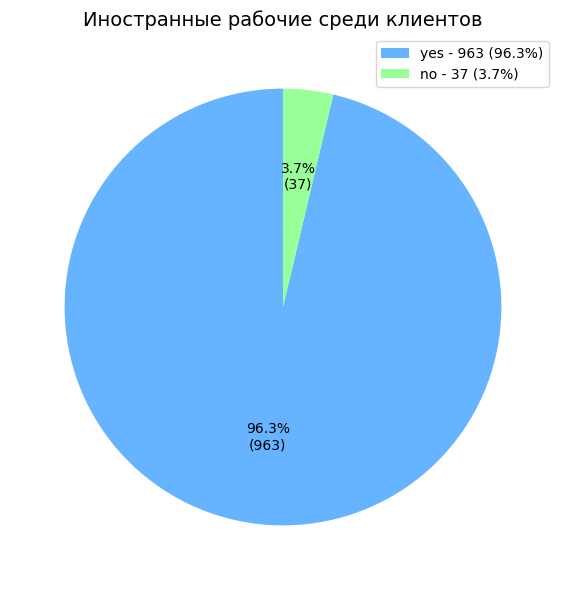

In [71]:
counts = df['foreign_worker'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(
    counts, 
    autopct=lambda p: f'{p:.1f}%\n({int(p/100 * counts.sum())})',
    startangle=90,
    colors=['#66b3ff', '#99ff99'],
)
plt.title('Иностранные рабочие среди клиентов', fontsize=14)
plt.legend(
    labels=[f'{label} - {count} ({pct:.1f}%)' for label, count, pct in zip(counts.index, counts, 100*counts/counts.sum())]
)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Плотность распределения')

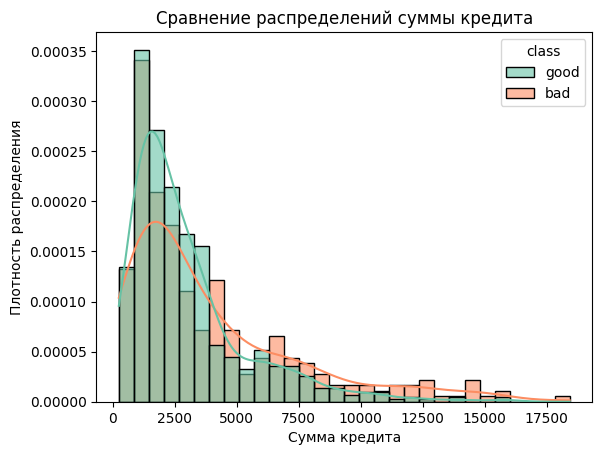

In [72]:
sns.histplot(data=df, x='credit_amount', hue='class', kde=True, 
             stat='density', common_norm=False, palette='Set2', 
             alpha=0.6, bins=30)
plt.title('Сравнение распределений суммы кредита')
plt.xlabel('Сумма кредита')
plt.ylabel('Плотность распределения')

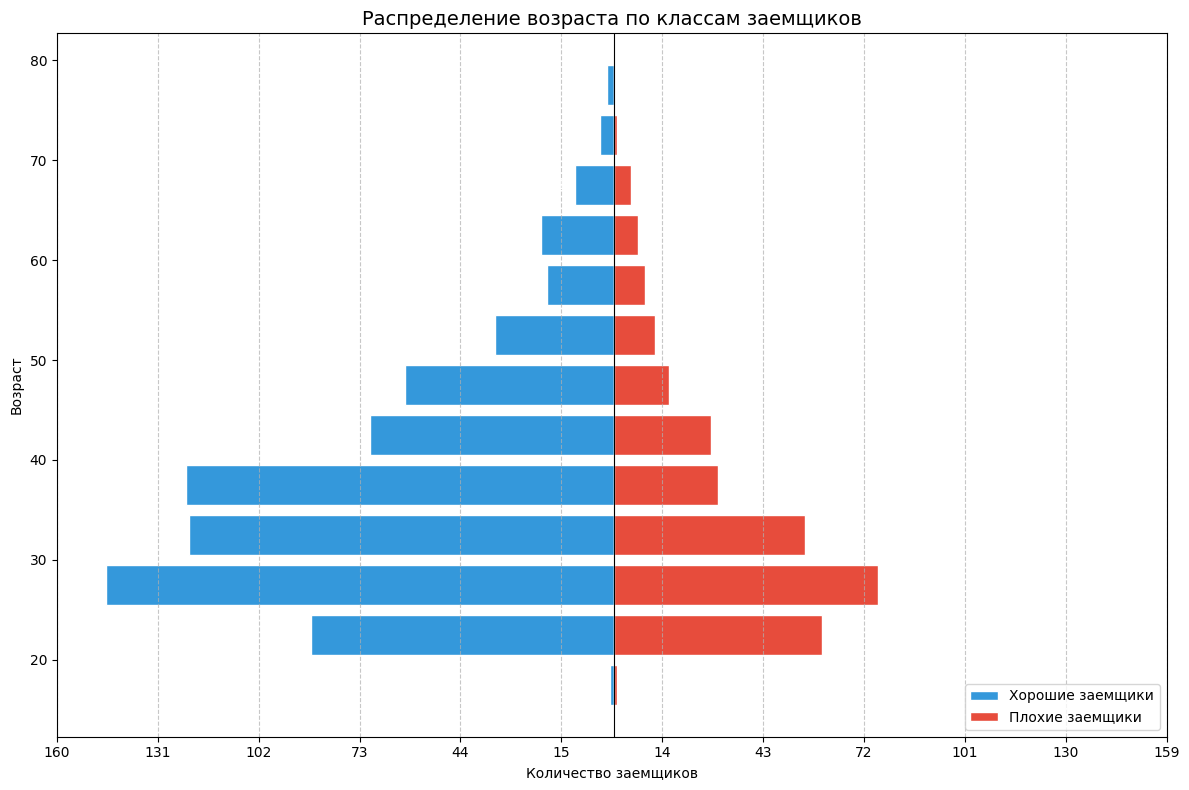

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

bin_step = 5
bins = pd.interval_range(
    start=df['age'].min() // bin_step * bin_step,
    end=df['age'].max() // bin_step * bin_step + bin_step,
    freq=bin_step,
    closed='left'
)

df['age_group'] = pd.cut(df['age'], bins=bins)
grouped = df.groupby(['age_group', 'class'], observed=False).size().unstack().fillna(0)
bin_centers = [interval.mid for interval in grouped.index]
plt.figure(figsize=(12, 8))

if 'good' in grouped.columns:
    plt.barh(bin_centers, -grouped['good'], 
             height=bin_step*0.8, 
             color='#3498db', 
             edgecolor='white',
             label='Хорошие заемщики')

if 'bad' in grouped.columns:
    plt.barh(bin_centers, grouped['bad'], 
             height=bin_step*0.8, 
             color='#e74c3c', 
             edgecolor='white',
             label='Плохие заемщики')

plt.xlabel('Количество заемщиков')
plt.ylabel('Возраст')
plt.title('Распределение возраста по классам заемщиков', fontsize=14)
plt.legend(loc='lower right' if grouped['good'].sum() > grouped['bad'].sum() else 'upper right')

max_val = max(grouped.max().max(), abs(grouped.min().min()))
x_ticks = range(-int(max_val*1.1), int(max_val*1.1)+1, int(max_val/5))
plt.xticks(x_ticks, [abs(x) for x in x_ticks])

plt.axvline(0, color='black', linewidth=0.8)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, center in enumerate(bin_centers):
    if 'good' in grouped.columns:
        count = grouped['good'].iloc[i]
        if count > 0:
            plt.text(-count-0.5, center, f'{int(count)}', 
                     ha='right', va='center', fontsize=9, color='white')
    
    if 'bad' in grouped.columns:
        count = grouped['bad'].iloc[i]
        if count > 0:
            plt.text(count+0.5, center, f'{int(count)}', 
                     ha='left', va='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()

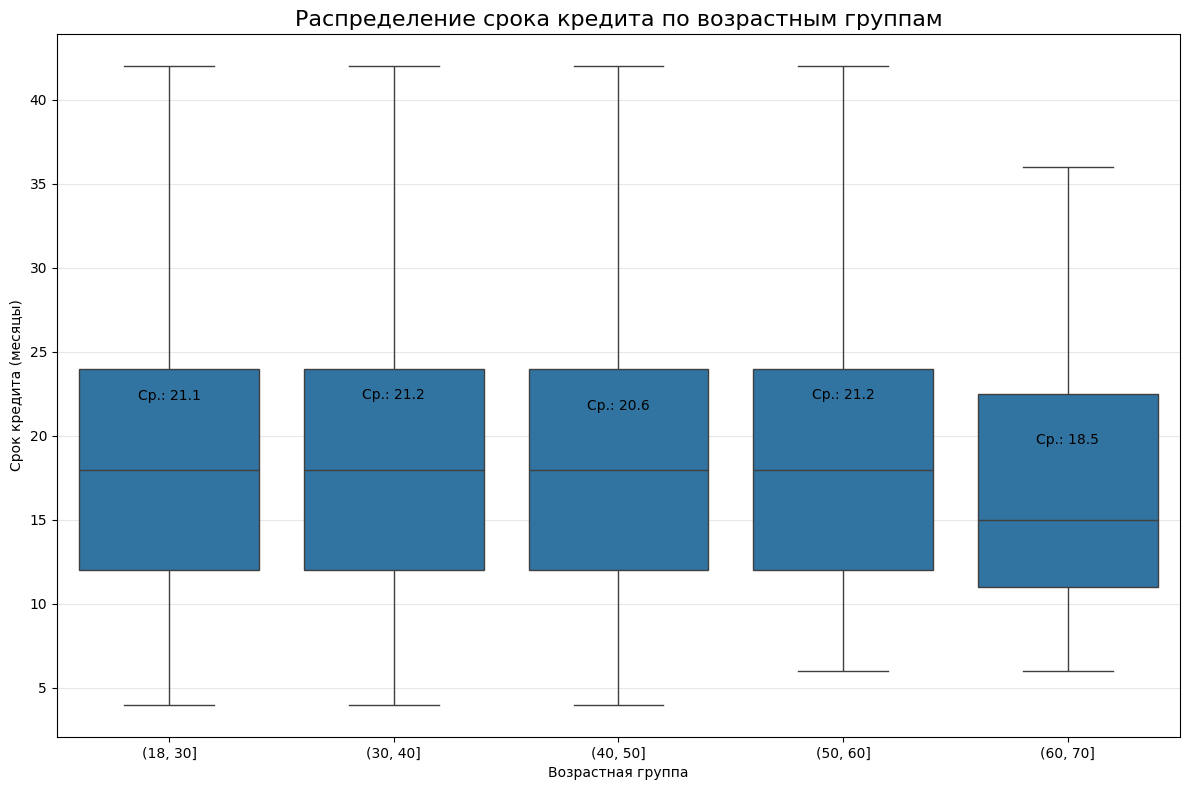

In [74]:
plt.figure(figsize=(12, 8))

df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 70])

sns.boxplot(x='age_group', y='duration', data=df, showfliers=False)

mean_values = df.groupby('age_group', observed=False)['duration'].mean().values
for i, mean_val in enumerate(mean_values):
    plt.text(i, mean_val+1, f'Ср.: {mean_val:.1f}', 
             ha='center', fontsize=10)

plt.title('Распределение срока кредита по возрастным группам', fontsize=16)
plt.xlabel('Возрастная группа')
plt.ylabel('Срок кредита (месяцы)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

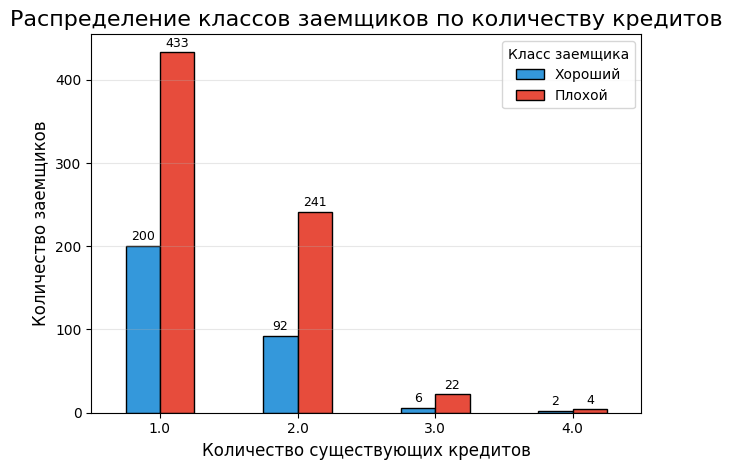

In [75]:
plt.figure(figsize=(12, 8))

grouped = df.groupby(['existing_credits', 'class'], observed=False).size().unstack().fillna(0)

ax = grouped.plot(kind='bar', stacked=False, color=['#3498db', '#e74c3c'], edgecolor='black')
plt.title('Распределение классов заемщиков по количеству кредитов', fontsize=16)
plt.xlabel('Количество существующих кредитов', fontsize=12)
plt.ylabel('Количество заемщиков', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Класс заемщика', labels=['Хороший', 'Плохой'])
plt.grid(axis='y', alpha=0.3)

for p in ax.containers:
    ax.bar_label(p, label_type='edge', padding=2, fontsize=9)

plt.tight_layout()
plt.show()

Распределение по профессиям (включая неизвестные):
job
skilled                      63.0
unskilled resident           20.0
high qualif/self emp/mgmt    14.8
unemp/unskilled non res       2.2
Name: proportion, dtype: float64


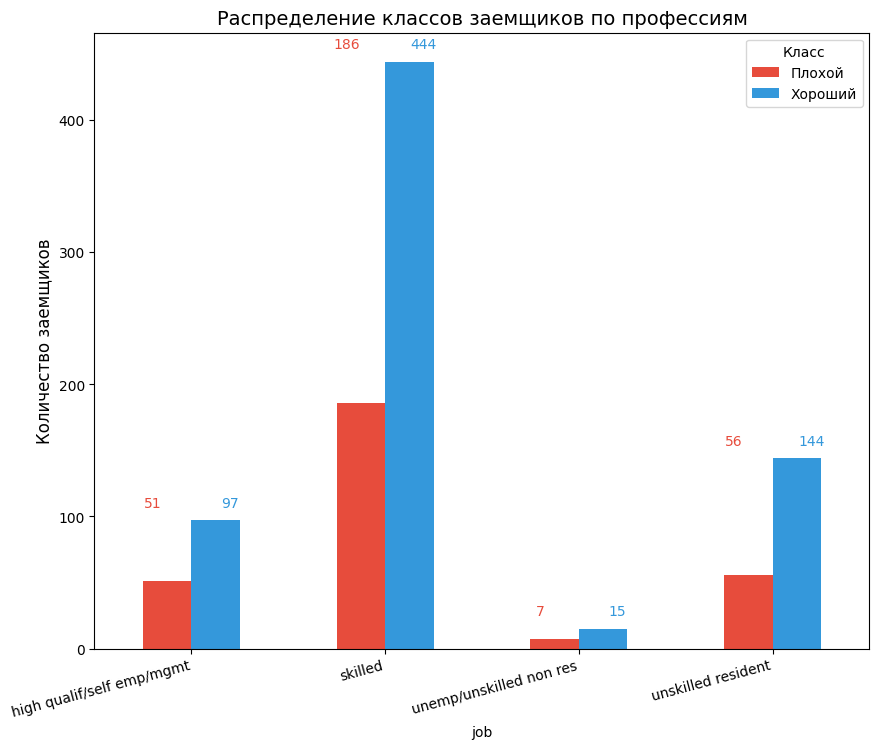

In [93]:
plt.figure(figsize=(10, 8))

job_distribution = df['job'].value_counts(normalize=True) * 100
print("Распределение по профессиям (включая неизвестные):")
print(job_distribution)

job_class_counts = df.groupby(['job', 'class']).size().unstack().fillna(0)
job_class_counts = job_class_counts[['bad', 'good']]

job_class_counts.plot(kind='bar', color=['#e74c3c', '#3498db'], ax=plt.gca())
plt.title('Распределение классов заемщиков по профессиям', fontsize=14)
plt.ylabel('Количество заемщиков', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.legend(title='Класс', labels=['Плохой', 'Хороший'])

for i, job in enumerate(job_class_counts.index):
    bad_count = job_class_counts.loc[job, 'bad']
    good_count = job_class_counts.loc[job, 'good']
    max_y = max([bad_count + 10, good_count + 10])
    plt.text(i-0.2, max_y, str(bad_count), ha='center', color='#e74c3c')
    plt.text(i+0.2, max_y, str(good_count), ha='center', color='#3498db')

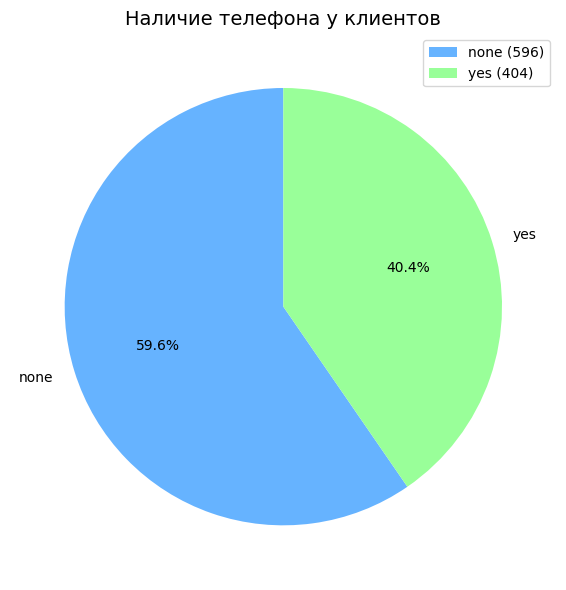

In [94]:
counts = df['own_telephone'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(
    counts, 
    labels=counts.index, 
    autopct='%1.1f%%', 
    startangle=90,
    colors=['#66b3ff', '#99ff99'],
)

plt.title('Наличие телефона у клиентов', fontsize=14)
plt.legend(loc="best", labels=[f'{label} ({count})' for label, count in zip(counts.index, counts)])
plt.tight_layout()
plt.show()

Распределение по наличию телефона:
own_telephone
none    59.6
yes     40.4
Name: proportion, dtype: float64


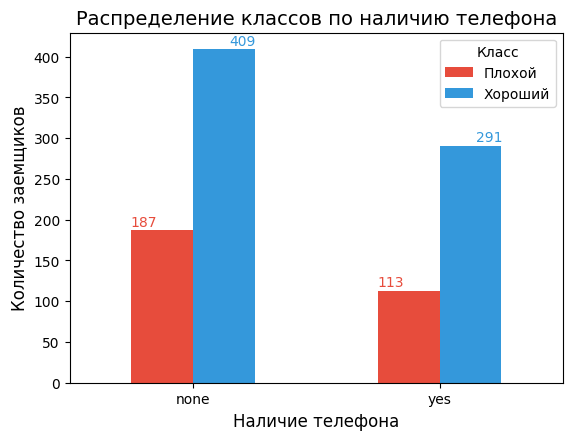

In [97]:
# Проверка распределения
phone_distribution = df['own_telephone'].value_counts(normalize=True) * 100
print("Распределение по наличию телефона:")
print(phone_distribution)

# Визуализация
plt.figure(figsize=(14, 10))

# График 1: Распределение классов по наличию телефона
plt.subplot(2, 2, 1)
phone_class_counts = df.groupby(['own_telephone', 'class']).size().unstack().fillna(0)
phone_class_counts = phone_class_counts[['bad', 'good']]  # Порядок: плохие, хорошие
phone_class_counts.plot(kind='bar', color=['#e74c3c', '#3498db'], ax=plt.gca())
plt.title('Распределение классов по наличию телефона', fontsize=14)
plt.xlabel('Наличие телефона', fontsize=12)
plt.ylabel('Количество заемщиков', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Класс', labels=['Плохой', 'Хороший'])

# Добавление значений
for i, status in enumerate(phone_class_counts.index):
    bad_count = phone_class_counts.loc[status, 'bad']
    good_count = phone_class_counts.loc[status, 'good']
    plt.text(i-0.2, bad_count + 5, str(bad_count), ha='center', color='#e74c3c')
    plt.text(i+0.2, good_count + 5, str(good_count), ha='center', color='#3498db')